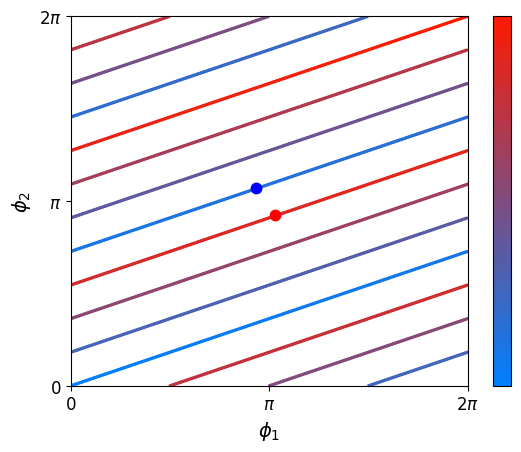

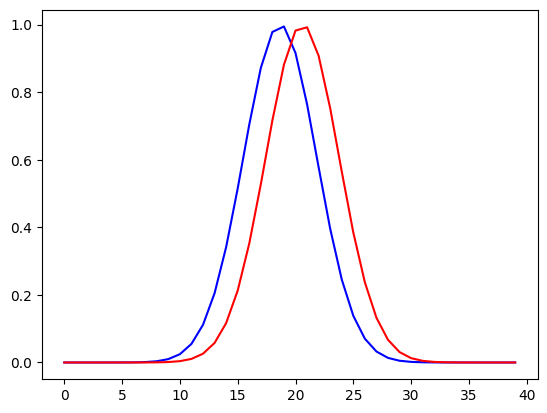

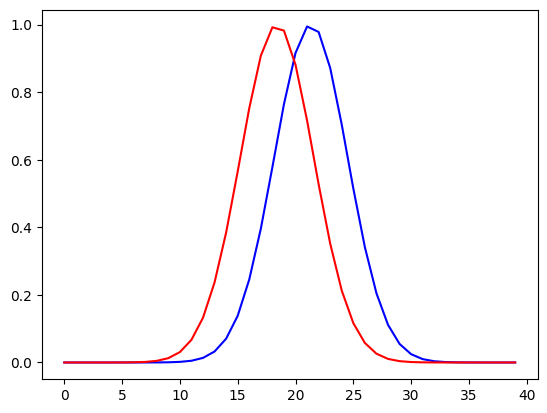

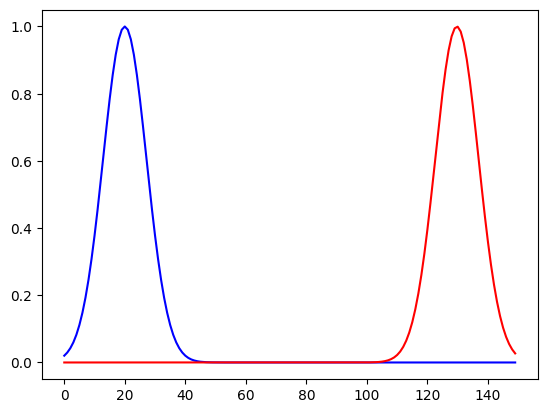

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

# 参数设置
lambda_1 = 4
lambda_2 = 11

# 数据生成
z = np.linspace(0, lambda_1 * lambda_2, 3000, endpoint=False)
phi_1 = z % lambda_1 * 2 * np.pi / lambda_1
phi_2 = z % lambda_2 * 2 * np.pi / lambda_2

# 自定义colormap
# colors = [(0, 0.5, 1), (1, 0.9, 0.), (1, 0.1, 0)]  # 这里是蓝色、绿色、红色
colors = [(0, 0.5, 1), (1, 0.1, 0)]  # 这里是蓝色、绿色、红色
n_bins = 100  # 使用的bins数量
cmap_name = 'my_custom_cmap'
cm = mcolors.LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

# 绘制散点图
plt.figure()
sc = plt.scatter(phi_1, phi_2, c=z, cmap=cm, s=2, vmin=0, vmax=lambda_1 * lambda_2)
point_1 = 400
point_2 = 2595
plt.plot(phi_1[point_1], phi_2[point_1]+0.01, 'b.', markersize=15)
plt.plot(phi_1[point_2], phi_2[point_2]+0.01, 'r.', markersize=15)

# 设置标签和字体大小
plt.xlabel(r'$\phi_1$', fontsize=14)
plt.ylabel(r'$\phi_2$', fontsize=14)

# 设置坐标范围
plt.xlim(0, 2 * np.pi)
plt.ylim(0, 2 * np.pi)

# 设置x和y轴刻度
plt.xticks([0, np.pi, 2 * np.pi], [r'$0$', r'$\pi$', r'$2\pi$'])
plt.yticks([0, np.pi, 2 * np.pi], [r'$0$', r'$\pi$', r'$2\pi$'])

# 添加colorbar并设置颜色范围
cbar = plt.colorbar(sc)
cbar.ax.tick_params(size=0)  # 隐藏colorbar的ticks
cbar.ax.set_yticklabels([])  # 删除colorbar的tick标签

# 调整整体字体大小
plt.tick_params(axis='both', which='major', labelsize=12)

# 保存图形为矢量图
plt.savefig('scatter_plot.svg', format='svg')

# 显示图形
plt.show()

def bump_phase(phi, a=0.5):
    n_neuron = 40
    theta = np.linspace(-np.pi, np.pi, n_neuron, endpoint=False)
    dis = np.abs(theta - phi)
    dis = np.where(dis < np.pi, dis, np.pi * 2 - dis)
    bump = np.exp(-(theta - phi)**2 / (2 * a**2)) + np.random.randn(n_neuron) * 0.
    return bump

plt.figure()
bump_1 = bump_phase(phi_1[point_1] - np.pi)
bump_2 = bump_phase(phi_1[point_2] - np.pi)
plt.plot(bump_1, 'b')
plt.plot(bump_2, 'r')

# 保存图形为矢量图
plt.savefig('bump_phase_1.svg', format='svg')

plt.figure()
bump_1 = bump_phase(phi_2[point_1] - np.pi)
bump_2 = bump_phase(phi_2[point_2] - np.pi)
plt.plot(bump_1, 'b')
plt.plot(bump_2, 'r')

# 保存图形为矢量图
plt.savefig('bump_phase_2.svg', format='svg')

def bump_pos(z, a=0.3 / np.pi / 2 * lambda_1 * lambda_2):
    x = np.linspace(0, lambda_1 * lambda_2, 150, endpoint=False)
    bump = np.exp(-(x - z)**2 / (2 * a**2))
    return bump

plt.figure()
bump_1 = bump_pos(z[point_1])
bump_2 = bump_pos(z[point_2])
plt.plot(bump_1, 'b')
plt.plot(bump_2, 'r')

# 保存图形为矢量图
plt.savefig('bump_pos.svg', format='svg')

# 显示图形
plt.show()
